# Car Price Prediction

In [496]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [499]:
data = pd.read_csv("CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data preprocessing

In [500]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [501]:
data.isnull().sum().sum()

0

In [502]:
data.duplicated().sum()

0

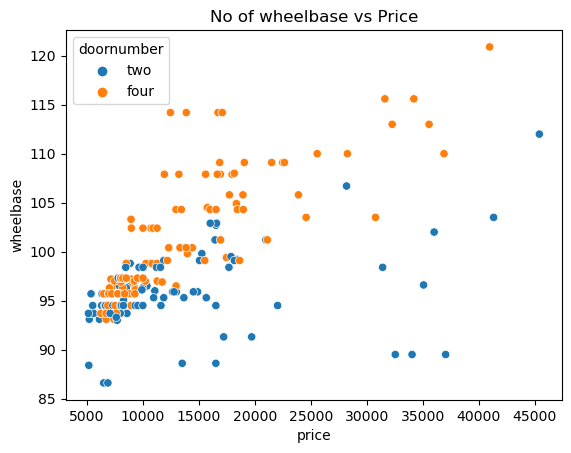

In [503]:
sns.scatterplot(data=data, x='price',y='wheelbase', hue='doornumber')
plt.title('No of wheelbase vs Price')
plt.show()

In [504]:
data_obj = data.select_dtypes(include='object')
data_obj.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,five,mpfi


In [505]:
#SEPRATE THE FEATURES AND LABELS
X = data.drop(columns=['price'])
y = data.price

# Encoding Categorical data

In [471]:
le_CarName = LabelEncoder()
X['CarName_n'] = le_CarName.fit_transform(X['CarName'])


In [472]:
le_fueltype = LabelEncoder()
X['fueltype_n'] = le_fueltype.fit_transform(X['fueltype'])


In [473]:
le_aspiration = LabelEncoder()
X['aspiration_n'] = le_aspiration.fit_transform(X['aspiration'])


In [474]:
le_doornumber = LabelEncoder()
X['doornumber_n'] = le_doornumber.fit_transform(X['doornumber'])


In [475]:
le_carbody = LabelEncoder()
X['carbody_n'] = le_carbody.fit_transform(X['carbody'])


In [476]:
le_drivewheel = LabelEncoder()
X['drivewheel_n'] = le_drivewheel.fit_transform(X['drivewheel'])


In [477]:
le_enginelocation = LabelEncoder()
X['enginelocation_n'] = le_enginelocation.fit_transform(X['enginelocation'])


In [478]:
le_cylindernumber = LabelEncoder()
X['cylindernumber_n'] = le_cylindernumber.fit_transform(X['cylindernumber'])


In [479]:
le_fuelsystem = LabelEncoder()
X['fuelsystem_n'] = le_fuelsystem.fit_transform(X['fuelsystem'])


In [480]:
X = X.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','fuelsystem'],axis='columns')
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,highwaympg,CarName_n,fueltype_n,aspiration_n,doornumber_n,carbody_n,drivewheel_n,enginelocation_n,cylindernumber_n,fuelsystem_n
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,27,2,1,0,1,0,2,0,2,5
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,27,3,1,0,1,0,2,0,2,5
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,26,1,1,0,1,2,2,0,3,5
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,30,4,1,0,0,3,1,0,2,5
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,22,5,1,0,0,3,0,0,1,5


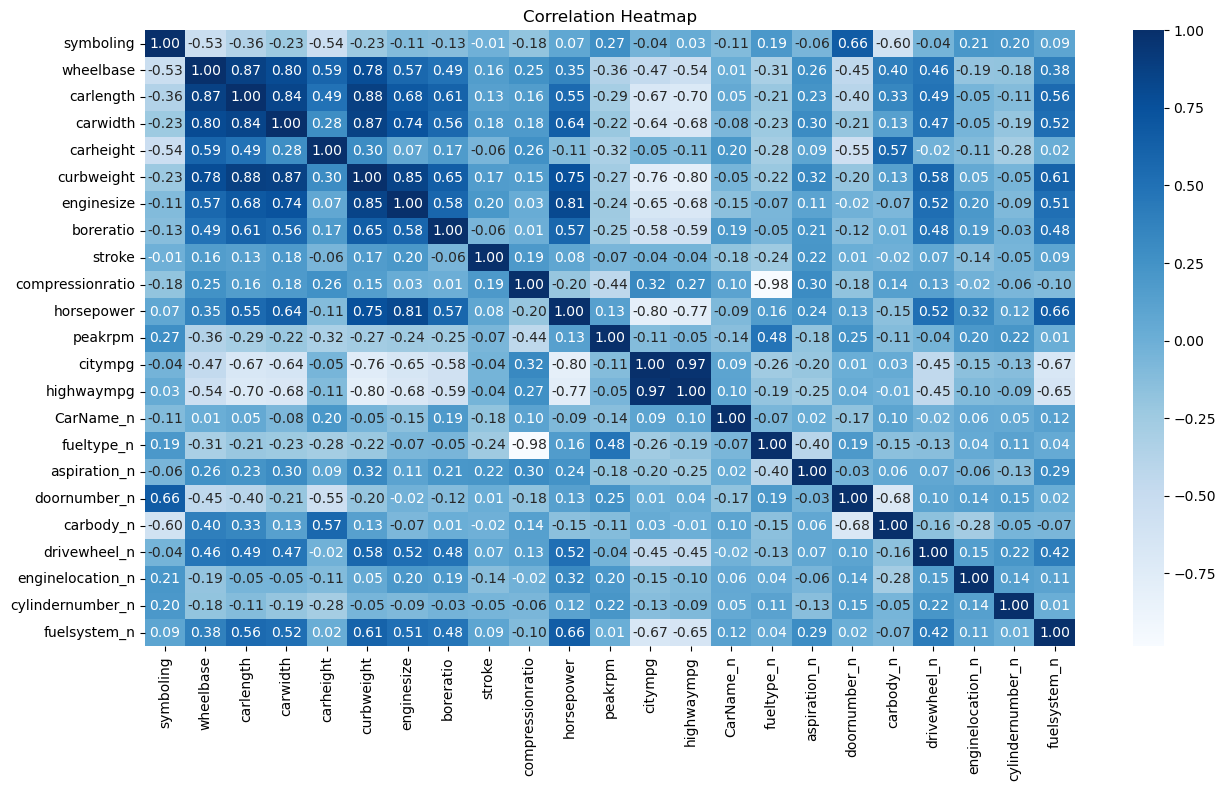

In [481]:
plt.figure(figsize=(15, 8))
sns.heatmap(X.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [482]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

# Model traning

In [483]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [484]:
y_pred = model.predict(X_test)
r2= r2_score(y_pred,y_test)
print('R Saqured score is:', r2)

R Saqured score is: 0.8063493625474132
